In [2]:
import numpy as np
import visualkeras as vk # pip install visualkeras
import pandas as pd
import seaborn as sn
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [3]:
train_data = np.load("Downloads/numpy/train_data.npy")
test_data = np.load("Downloads/numpy/test_data.npy")
train_labels = np.load("Downloads/numpy/train_labels.npy")
test_labels = np.load("Downloads/numpy/test_labels.npy")

In [5]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(36, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 20, 20, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                        

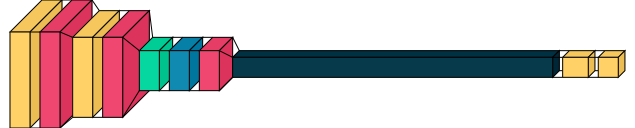

In [28]:
vk.layered_view(model)

In [37]:
best_loss_checkpoint = ModelCheckpoint(
    filepath="Downloads/best_loss_model.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="Downloads/best_val_loss_model.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

In [35]:
import h5py

In [38]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels), 
    epochs=10, 
    batch_size=200, 
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/10
1770/1770 [==============================] - 866s 489ms/step - loss: 0.0409 - accuracy: 0.9868 - val_loss: 0.0603 - val_accuracy: 0.9826
Epoch 2/10
1770/1770 [==============================] - 861s 486ms/step - loss: 0.0321 - accuracy: 0.9895 - val_loss: 0.0565 - val_accuracy: 0.9852
Epoch 3/10
1770/1770 [==============================] - 858s 485ms/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.0462 - val_accuracy: 0.9877
Epoch 4/10
1770/1770 [==============================] - 865s 489ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0459 - val_accuracy: 0.9884
Epoch 5/10
1770/1770 [==============================] - 865s 489ms/step - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0575 - val_accuracy: 0.9857
Epoch 6/10
1770/1770 [==============================] - 869s 491ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.0431 - val_accuracy: 0.9897
Epoch 7/10
1770/1770 [==============================] - 865s 489ms/step - loss: 0.0170 - accuracy: 0.9942 - val_

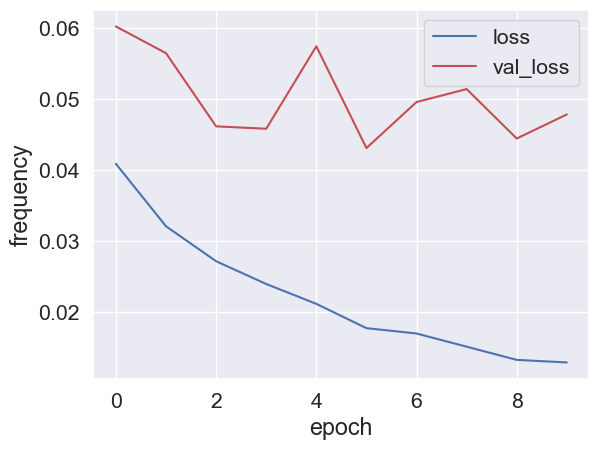

In [39]:
plt.plot(history.history["loss"], 'b', label="loss")
plt.plot(history.history["val_loss"], 'r', label="val_loss")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [40]:
plt.plot(history.history["acc"], 'b', label="acc")
plt.plot(history.history["val_acc"], 'r', label="val_acc")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

KeyError: 'acc'

In [44]:
model.load_weights("Downloads/best_val_loss_model.h5")

In [42]:
loss, acc = model.evaluate(test_data, test_labels)
print(loss, acc)

2766/2766 [==============================] - 55s 20ms/step - loss: 0.0431 - accuracy: 0.9897
0.043146632611751556 0.9897276759147644


In [6]:
predictions = model.predict(test_data)

2766/2766 [==============================] - 46s 16ms/step


In [46]:
confusion = confusion_matrix(
    np.argmax(test_labels, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)

[[2743    0    0 ...    0    0    0]
 [   1 1708    0 ...    0    3    0]
 [   0    0 4437 ...    0    0    0]
 ...
 [   0    0    0 ... 1375    2    1]
 [   0    8    0 ...    0 1387    1]
 [   0    0    0 ...    6    4 1295]]


<AxesSubplot:xlabel='predicted', ylabel='actual'>

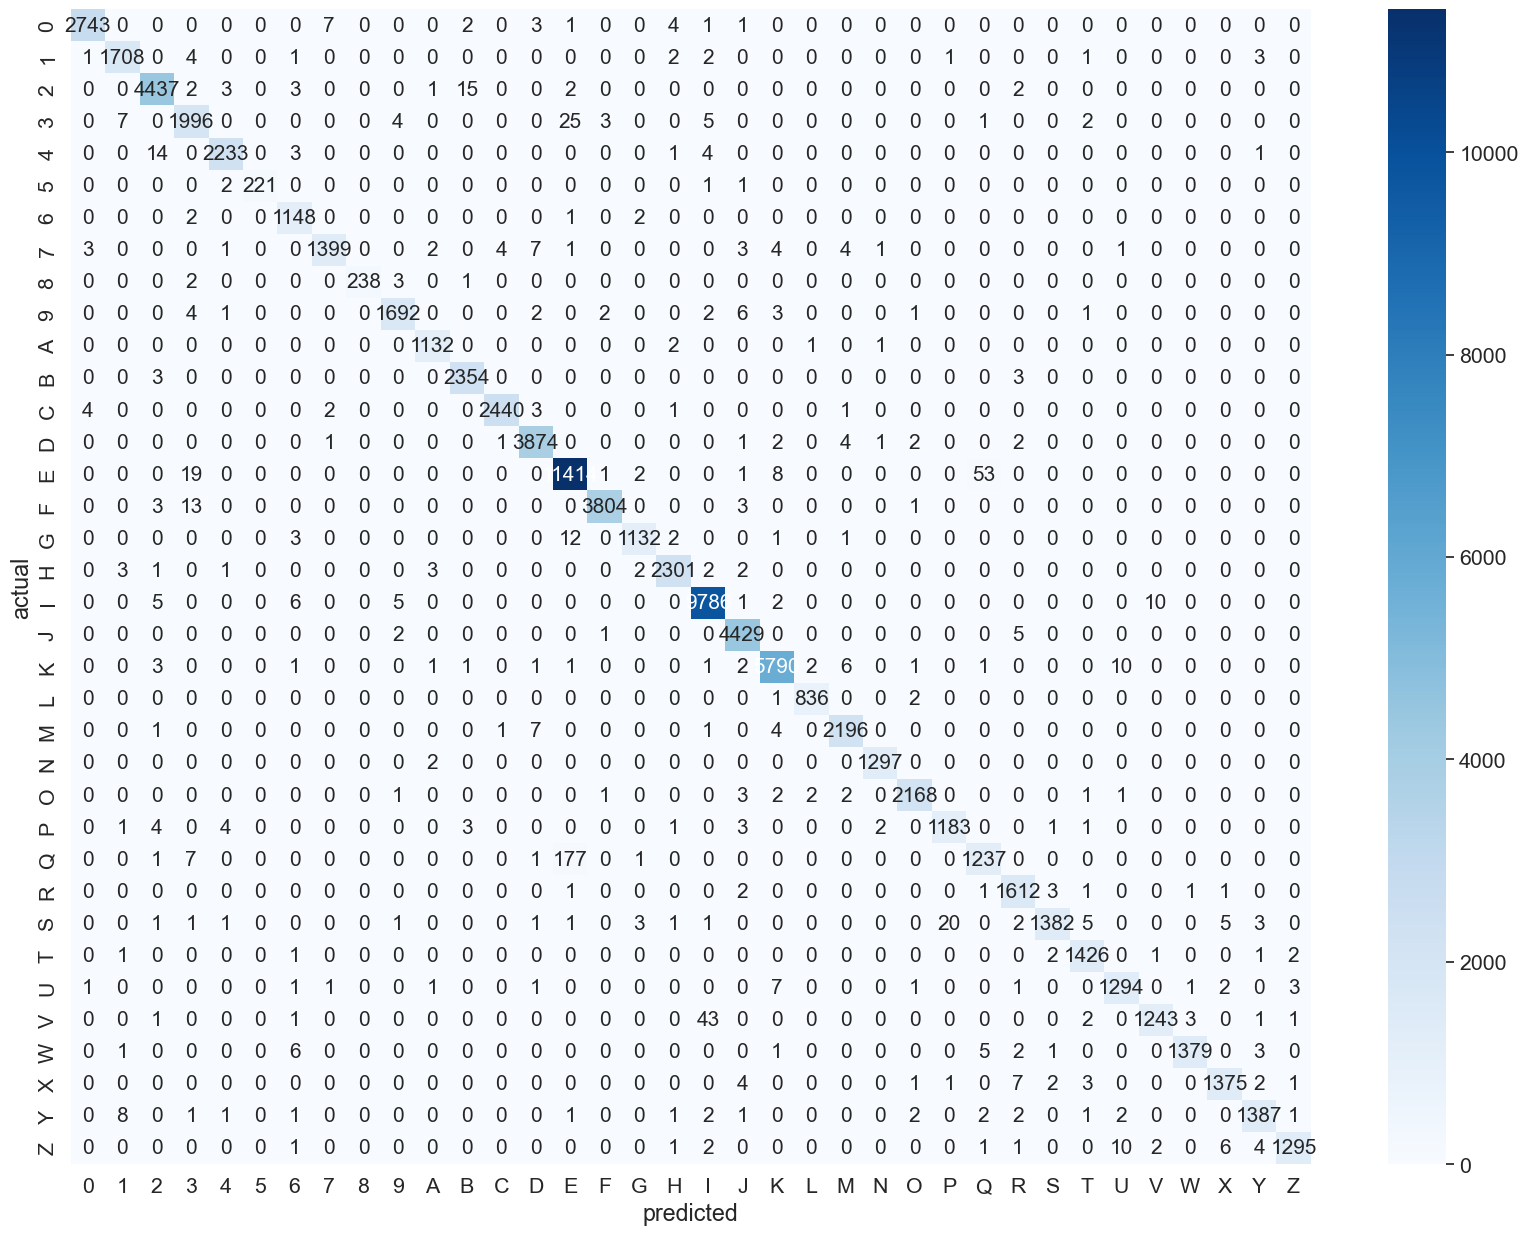

In [47]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (20,15))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")

In [1]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,test_labels)

NameError: name 'prediction' is not defined